# 1. Read the column description and ensure you understand each attribute well 

#Column Information

ID: Customer ID

Age: Customer's age in completed years

Experience: Number of years of professional experience

Income: Annual income of the customer

ZIPCode: Home Address ZIP code.

Family: Family size of the customer

CCAvg: spending on credit cards per month

Education: Education Level.
1: Undergrad
2: Graduate
3: Advanced/Professional

Mortgage: Mortgage Value of house mortgage if any.

PersonalLoan: Did this customer accept the personal loan offered in the last campaign?

SecuritiesAccount: Does the customer have a securities account with the bank?

CDAccount: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

CreditCard: Does the customer uses a credit card issued by UniversalBank?

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading data
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
#First 5 rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
shape=df.shape  #Provides the Shape in (Rows, Columns) in the Data Frame df
print('shape of the data frame is =',shape)

shape of the data frame is = (5000, 14)


In [5]:
#Column names
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# 2. Study the data distribution in each attribute, share your findings

In [6]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Converting the Data type for the Categorical attributes from Int to Category data type
df = df.astype({"ID":'category',"ZIP Code":'category',"Family":'category',
              "Education":'category',"Personal Loan":'category',"Securities Account":'category',
            "CD Account":'category',"Online":'category',"CreditCard":'category'}) 

In [8]:
i = 0
#Length of the coulmns of the data fram
n=len(df.columns)
#List of all the attribues in the data frame 
List=list(df.columns.values)
print('Data type of each attribute of Data frame:\n')
while i < n:     
    New_List=List[i]
    Data_type=df[New_List].dtype
    print('Data Type of',New_List,'attribute is:',Data_type)
    i=i+1

Data type of each attribute of Data frame:

Data Type of ID attribute is: category
Data Type of Age attribute is: int64
Data Type of Experience attribute is: int64
Data Type of Income attribute is: int64
Data Type of ZIP Code attribute is: category
Data Type of Family attribute is: category
Data Type of CCAvg attribute is: float64
Data Type of Education attribute is: category
Data Type of Mortgage attribute is: int64
Data Type of Personal Loan attribute is: category
Data Type of Securities Account attribute is: category
Data Type of CD Account attribute is: category
Data Type of Online attribute is: category
Data Type of CreditCard attribute is: category


In [9]:
print('Checking the presence of missing values in the Data frame:\n')
null_value_count = df.isnull().sum() 

i = 0

#Length of the coulmns of the data fram
n=len(df.columns)

#List of all the attribues in the data frame 
List=list(df.columns.values)

while i < n:   
    New_List=List[i]
    print('There are',null_value_count[i],'null values in',New_List,'attribute in the dataframe')

    i=i+1

Checking the presence of missing values in the Data frame:

There are 0 null values in ID attribute in the dataframe
There are 0 null values in Age attribute in the dataframe
There are 0 null values in Experience attribute in the dataframe
There are 0 null values in Income attribute in the dataframe
There are 0 null values in ZIP Code attribute in the dataframe
There are 0 null values in Family attribute in the dataframe
There are 0 null values in CCAvg attribute in the dataframe
There are 0 null values in Education attribute in the dataframe
There are 0 null values in Mortgage attribute in the dataframe
There are 0 null values in Personal Loan attribute in the dataframe
There are 0 null values in Securities Account attribute in the dataframe
There are 0 null values in CD Account attribute in the dataframe
There are 0 null values in Online attribute in the dataframe
There are 0 null values in CreditCard attribute in the dataframe


In [10]:
#Stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


Minimum value of Experience is -3, As experience value can't be negative, we will find the number of values data which has negative experience and will replace it using the median value for the respective age and education level from the remaining data which has the positive experience value

In [11]:
#Number of Negative values in Experience
df[df['Experience']<0]['Experience'].count() 

52

In [12]:
#clean the negative variable
dfExp = df.loc[df['Experience'] >=0]
negExp = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [13]:
## Before replacing the Negative Experience we will check what median values we get from the below model
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    ##df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp 
    print('Age:',age,'Exp:',exp)       

Age: 25 Exp: 0.0
Age: 24 Exp: 0.0
Age: 24 Exp: 0.0
Age: 28 Exp: 3.0
Age: 24 Exp: 0.0
Age: 25 Exp: 0.0
Age: 25 Exp: 0.0
Age: 25 Exp: 0.0
Age: 24 Exp: 0.0
Age: 24 Exp: 0.0
Age: 25 Exp: 0.0
Age: 23 Exp: nan
Age: 24 Exp: 0.0
Age: 24 Exp: 0.0
Age: 24 Exp: 0.0
Age: 23 Exp: nan
Age: 24 Exp: 0.0
Age: 25 Exp: 1.0
Age: 25 Exp: 0.0
Age: 25 Exp: 1.0
Age: 25 Exp: 0.0
Age: 23 Exp: nan
Age: 24 Exp: 0.0
Age: 25 Exp: 0.0
Age: 23 Exp: nan
Age: 23 Exp: nan
Age: 24 Exp: 0.0
Age: 24 Exp: 0.0
Age: 23 Exp: nan
Age: 25 Exp: 0.0
Age: 29 Exp: 3.0
Age: 23 Exp: nan
Age: 23 Exp: nan
Age: 26 Exp: 1.0
Age: 25 Exp: 0.0
Age: 25 Exp: 1.0
Age: 25 Exp: 0.0
Age: 23 Exp: nan
Age: 24 Exp: 0.0
Age: 24 Exp: 0.0
Age: 23 Exp: nan
Age: 24 Exp: 0.0
Age: 25 Exp: 0.0
Age: 25 Exp: 1.0
Age: 29 Exp: 3.0
Age: 24 Exp: 0.0
Age: 23 Exp: nan
Age: 23 Exp: nan
Age: 25 Exp: 0.0
Age: 24 Exp: 0.0
Age: 25 Exp: 0.0
Age: 29 Exp: 3.0


Observation: 
We can't able to predict the value of the experince for the Age='23', as there are no positive values of experience available for the age 23 in the data frame df.

using the absolute value or replacing Nan value will be a Bias for the Model.

As the number of negative experience value is only 52 out of 5000, we can drop these data from the data frame.

# Univariate Analysis

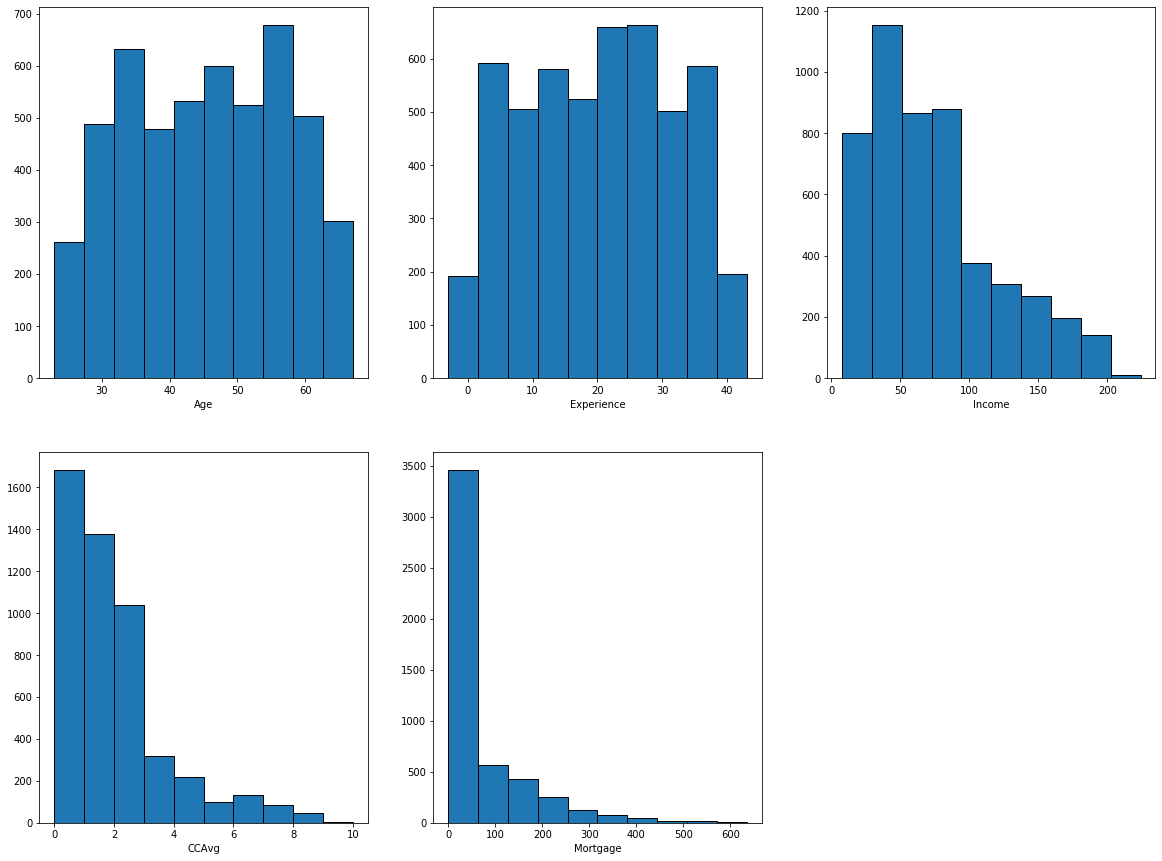

In [14]:
# Histogram Plot of Quantitative Data
plt.figure(figsize= (20,15))

plt.subplot(2,3,1)
plt.hist(df['Age'],edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(2,3,2)
plt.hist(df['Experience'],edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(2,3,3)
plt.hist(df['Income'],edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(2,3,4)
plt.hist(df['CCAvg'],edgecolor = 'black')
plt.xlabel('CCAvg')

plt.subplot(2,3,5)
plt.hist(df['Mortgage'],edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show() 

Observation:

Mortgage and income are positively skewed               
Experience is evenly distributed

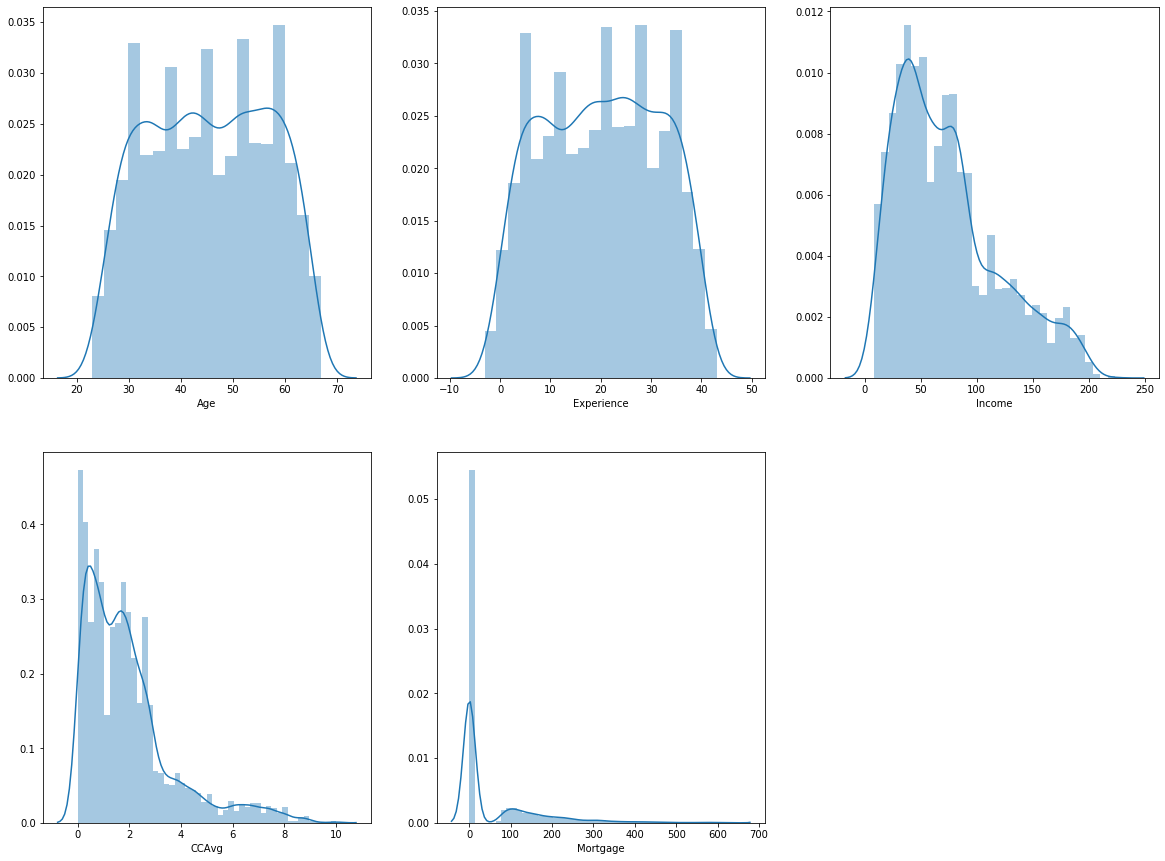

In [15]:
plt.figure(figsize= (20,15))

plt.subplot(2,3,1)
sns.distplot(df['Age'])
plt.xlabel('Age')

plt.subplot(2,3,2)
sns.distplot(df['Experience'])
plt.xlabel('Experience')

plt.subplot(2,3,3)
sns.distplot(df['Income'])
plt.xlabel('Income')

plt.subplot(2,3,4)
sns.distplot(df['CCAvg'])
plt.xlabel('CCAvg')

plt.subplot(2,3,5)
sns.distplot(df['Mortgage'])
plt.xlabel('Mortgage')

plt.show() 

In [16]:
print('Measure of skewness of Quantitative Data')
i = 0
List=['Age','Experience','CCAvg','Mortgage','Income']
n=len(List)
while i < n:   
    New_List=List[i]
    skew=df[New_List].skew(axis = 0, skipna = True)
    if (skew==0):
        conclusion='Data is normally distributed or Symmetric'
    elif(skew<0):
        conclusion='Data is Left-Skewed'
    else:
        conclusion='Data is Right-Skewed'     
    print('Skewness of',New_List,'is: %.3f'%skew,'and',conclusion)
    i=i+1

Measure of skewness of Quantitative Data
Skewness of Age is: -0.029 and Data is Left-Skewed
Skewness of Experience is: -0.026 and Data is Left-Skewed
Skewness of CCAvg is: 1.598 and Data is Right-Skewed
Skewness of Mortgage is: 2.104 and Data is Right-Skewed
Skewness of Income is: 0.841 and Data is Right-Skewed


In [17]:
print('Checking the presence of outliers of Quantitative Data')
i = 0
List=['Age','Experience','CCAvg','Mortgage','Income']
n=len(List)
while i < n:   
    New_List=List[i]
    minimum,q1,q3,maximum= np.percentile(df[New_List],[0,25,75,100])
    iqr=q3-q1
    lower_value=q1-(1.5 * iqr)
    upper_value=q3+(1.5 * iqr)
    if ((minimum<lower_value) or (maximum>upper_value)):
        outliers = [x for x in df[New_List] if x < lower_value or x > upper_value]
        print('Identified outliers for',New_List,'out of', len(df[New_List]),'records: %d' % len(outliers))
    else:
        print('There is no outlier for the attribute',New_List)        
    i=i+1 

Checking the presence of outliers of Quantitative Data
There is no outlier for the attribute Age
There is no outlier for the attribute Experience
Identified outliers for CCAvg out of 5000 records: 324
Identified outliers for Mortgage out of 5000 records: 291
Identified outliers for Income out of 5000 records: 96


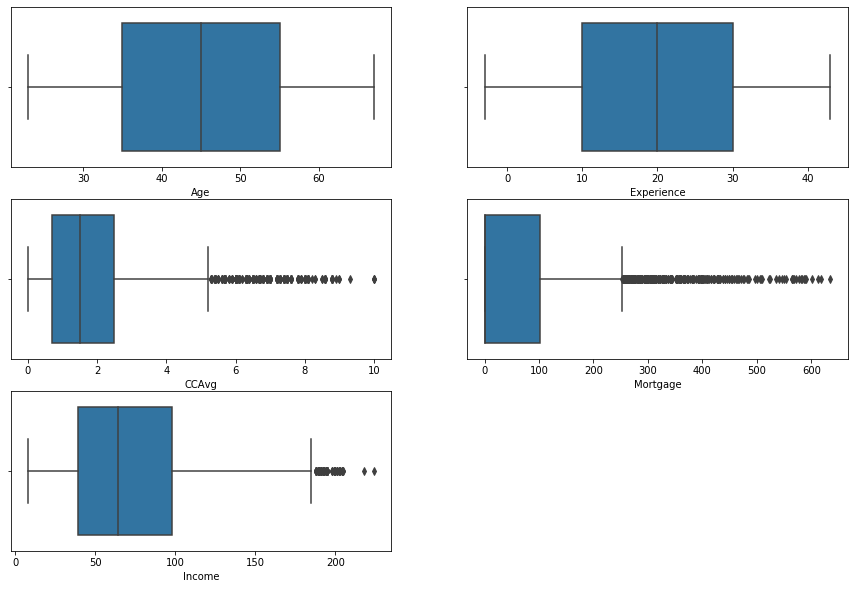

In [18]:
#Checking for the outliers using boxplot
plt.figure(figsize= (15,10))
plt.subplot(3,2,1)
sns.boxplot(x=df.Age)
plt.subplot(3,2,2)
sns.boxplot(x= df.Experience)
plt.subplot(3,2,3)
sns.boxplot(x= df.CCAvg)
plt.subplot(3,2,4)
sns.boxplot(x= df.Mortgage)
plt.subplot(3,2,5)
sns.boxplot(x= df.Income)
plt.show()

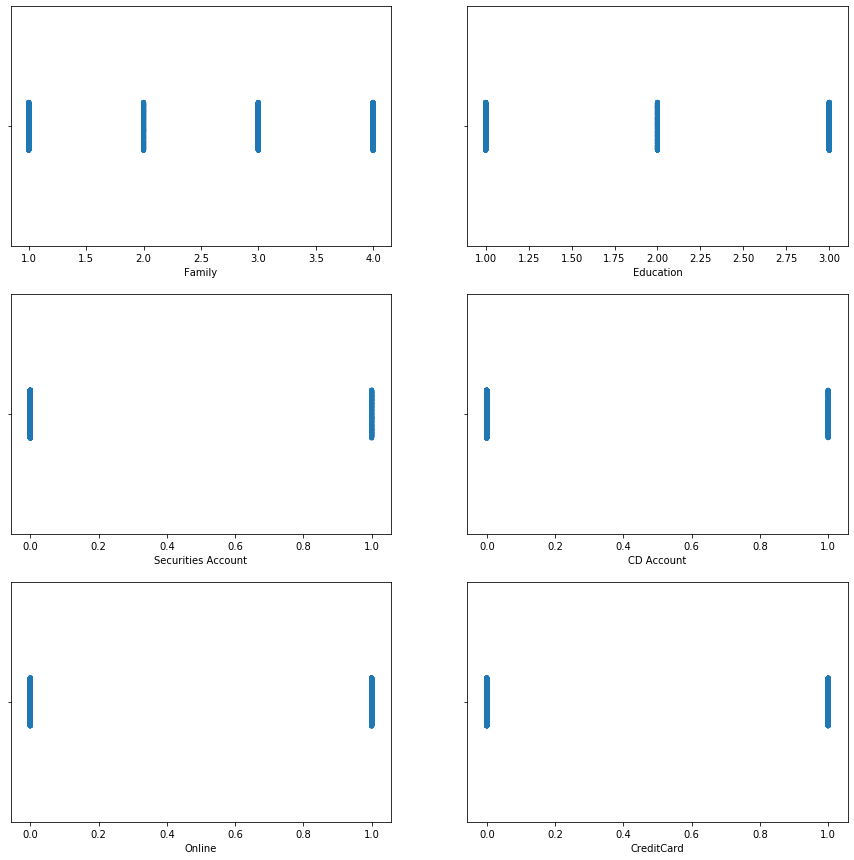

In [19]:
#Distribution of categorical attribute using stripplot

plt.figure(figsize= (15,15))

plt.subplot(3,2,1)
sns.stripplot(df['Family'])

plt.subplot(3,2,2)
sns.stripplot(df['Education'])

plt.subplot(3,2,3)
sns.stripplot(df['Securities Account'])

plt.subplot(3,2,4)
sns.stripplot(df['CD Account'])

plt.subplot(3,2,5)
sns.stripplot(df['Online'])

plt.subplot(3,2,6)
sns.stripplot(df['CreditCard'])

plt.show()

From the above stripplot() visualisation for individual categorical attributes we are unable to predict much insights.
so we use box-plot/one-way table for further analysis

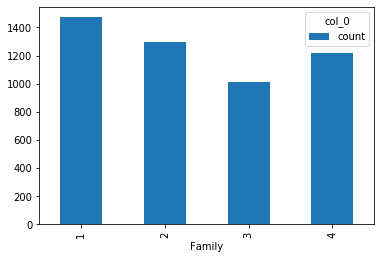

In [20]:
my_tab = pd.crosstab(index = df['Family'],columns="count")  
my_tab.plot.bar()
plt.show()

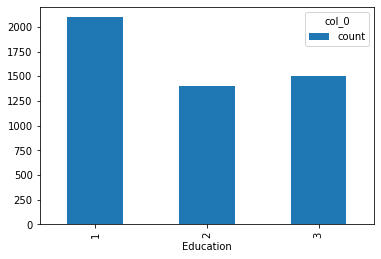

In [21]:
my_tab = pd.crosstab(index = df['Education'],columns="count")  
my_tab.plot.bar()
plt.show()

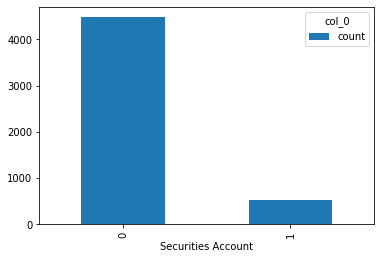

In [22]:
my_tab = pd.crosstab(index = df['Securities Account'],columns="count")  
my_tab.plot.bar()
plt.show()

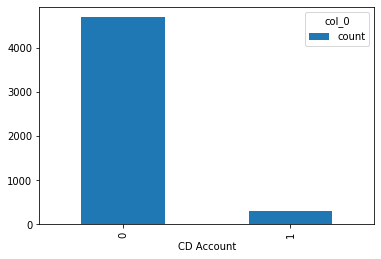

In [23]:
my_tab = pd.crosstab(index = df['CD Account'],columns="count")  
my_tab.plot.bar()
plt.show()

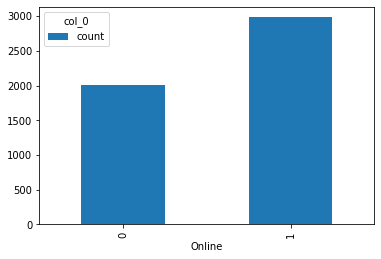

In [24]:
my_tab = pd.crosstab(index = df['Online'],columns="count")  
my_tab.plot.bar()
plt.show()

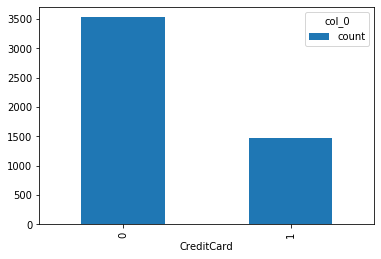

In [25]:
my_tab = pd.crosstab(index = df['CreditCard'],columns="count")  
my_tab.plot.bar()
plt.show()

Observations:

    Online: Comparatively More number number of people are using internet banking facility 
    Credit Card: Comparatively less number of people are using Credit card issued from the universal Bank
    Security Account: Very less people are having security account with the bank
    CD Account: Very less number of people are having COD account with the bank   
        

Feature correlation analysis

                 Age  Experience    Income     CCAvg  Mortgage
Age         1.000000    0.994215 -0.055269 -0.052012 -0.012539
Experience  0.994215    1.000000 -0.046574 -0.050077 -0.010582
Income     -0.055269   -0.046574  1.000000  0.645984  0.206806
CCAvg      -0.052012   -0.050077  0.645984  1.000000  0.109905
Mortgage   -0.012539   -0.010582  0.206806  0.109905  1.000000


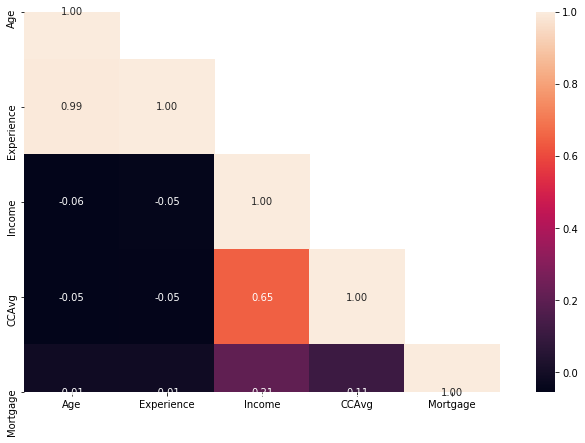

In [26]:
corr = df.corr()
print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

plt.figure(figsize=(13,7))
sns.heatmap(corr, mask=mask,annot=True,square=True,fmt='.2f')
#sns.heatmap(corr,annot=True,square=True

Observation :

Income and CCAvg is moderately correlated.            
Age and Experience is highly correlated (We can drop age or experience attribute from the data frame as its highly correlated)            
Income, CCAvg have positive association with Personal Loan

# Multivariate analysis

In [27]:
# Pairplot
#sns.pairplot(df)

Observations from Distribution Analysis:

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.                    We can confirm this by looking at the describe statement above, which shows mean is almost equal to median                     
Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to  median.                   
Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median                    
CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K    
Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
The variables family and education are ordinal variables. The distribution of families is evenly distributed

# 3. Get the target column distribution. Your comments

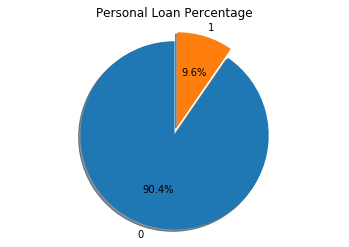

In [28]:
# Pie chart distribution for Target variable 'Personal Loan'
labels = [0,1]
sizes=df['Personal Loan'].value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

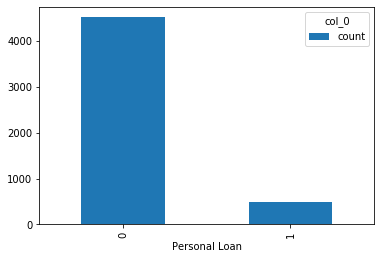

In [29]:
my_tab = pd.crosstab(index = df['Personal Loan'],columns="count")  
my_tab.plot.bar()
plt.show()

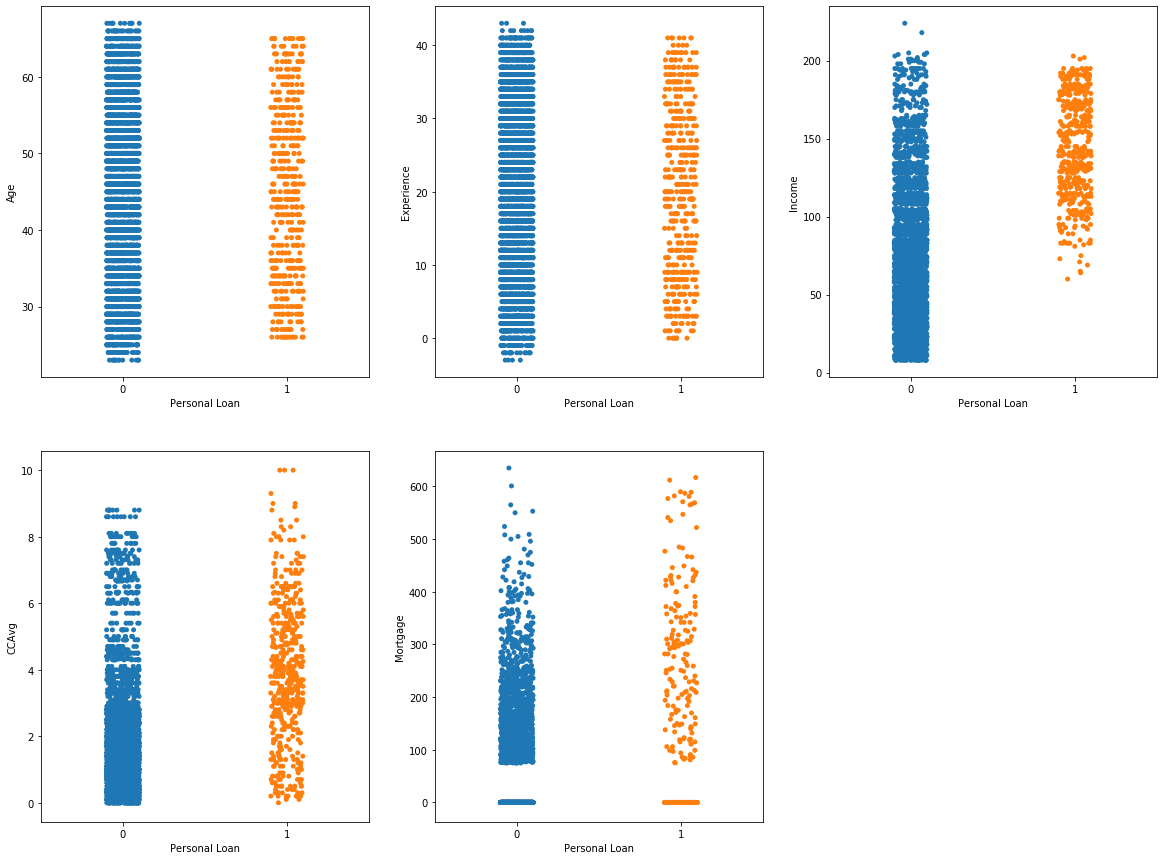

In [30]:
#Distribution of Quantitaive data vs Personal Loan
plt.figure(figsize= (20,15))

plt.subplot(2,3,1)
sns.stripplot(df['Personal Loan'],df['Age'])

plt.subplot(2,3,2)
sns.stripplot(df['Personal Loan'],df['Experience'])

plt.subplot(2,3,3)
sns.stripplot(df['Personal Loan'],df['Income'])

plt.subplot(2,3,4)
sns.stripplot(df['Personal Loan'],df['CCAvg'])

plt.subplot(2,3,5)
sns.stripplot(df['Personal Loan'],df['Mortgage'])

plt.show() 

Text(0.5, 1.0, 'Mortgage Distribution')

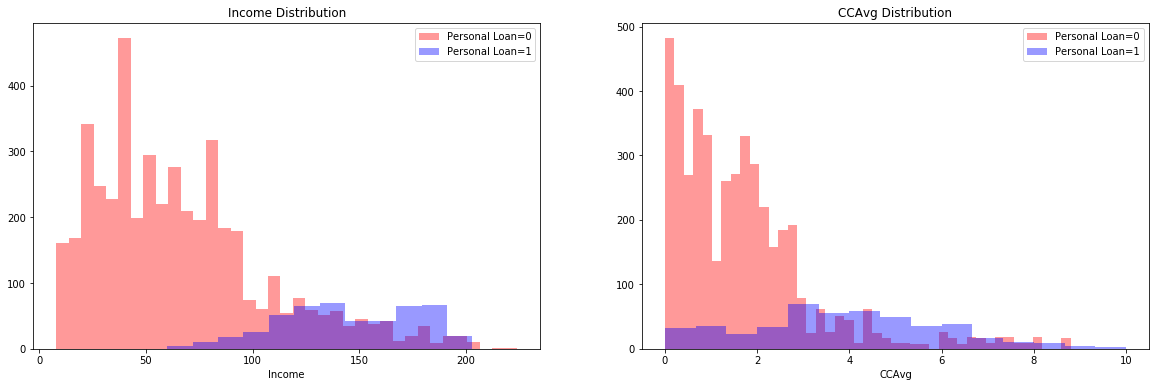

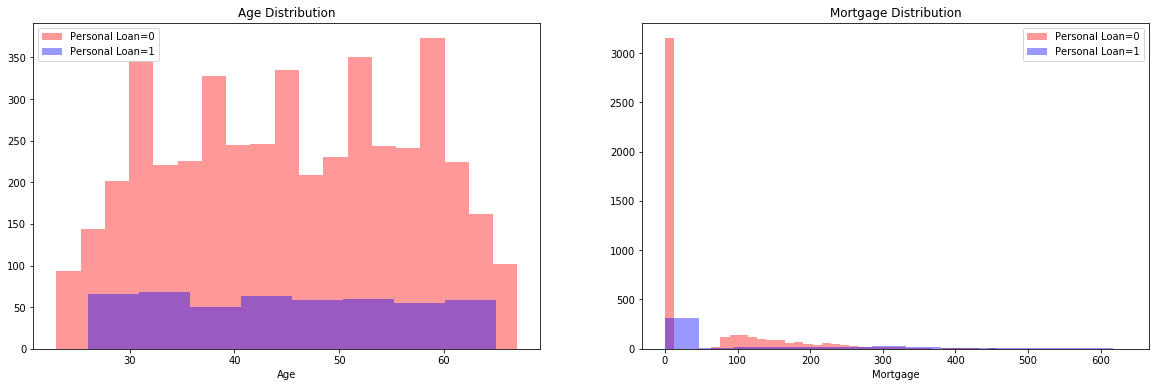

In [31]:
# Income Distribution Against Personal Loan
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

## CCAvg Distribution against Personal Loan
plt.subplot(1, 2, 2)
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CCAvg Distribution")

# Age Distribution against Personal Loan
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot(df[df["Personal Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Age'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Age Distribution")

# Mortgage Distribution against Personal Loan
plt.subplot(1, 2, 2)
sns.distplot(df[df["Personal Loan"] == 0]['Mortgage'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df[df["Personal Loan"] == 1]['Mortgage'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Mortgage Distribution")

In [32]:
print('Income of Non-Loan customers: ',
      df[df["Personal Loan"] == 0]['Income'].median()*1000) #(multiply income by 1000 since its been mentioned in the data as $000)
print('Income of Loan customers    : ', 
      df[df["Personal Loan"] == 1]['Income'].median()*1000) #(multiply income by 1000 since its been mentioned in the data as $000)
print('\n')
print('Credit card spending of Non-Loan customers: ',
      df[df["Personal Loan"] == 0]['CCAvg'].median()*1000) #(multiply CCAvg by 1000 since its been mentioned in the data as $000)
print('Credit card spending of Loan customers    : ', 
      df[df["Personal Loan"] == 1]['CCAvg'].median()*1000) #(multiply CCAvg by 1000 since its been mentioned in the data as $000)
print('\n')
print('Age of Non-Loan customers: ',
      df[df["Personal Loan"] == 0]['Age'].median())
print('Age of Loan customers    : ', 
      df[df["Personal Loan"] == 1]['Age'].median())
print('\n')
print('Mortgage of Non-Loan customers: ',
      df[df["Personal Loan"] == 0]['Mortgage'].mean()*1000) #(multiply Mortgage by 1000 since its been mentioned in the data as $000)
print('Mortgage of Loan customers    : ', 
      df[df["Personal Loan"] == 1]['Mortgage'].mean()*1000) #(multiply Mortgage by 1000 since its been mentioned in the data as $000)

Income of Non-Loan customers:  59000.0
Income of Loan customers    :  142500.0


Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Age of Non-Loan customers:  45.0
Age of Loan customers    :  45.0


Mortgage of Non-Loan customers:  51789.38053097345
Mortgage of Loan customers    :  100845.83333333333


Observation :

The graph shows the income of people with personal loan is higher.             
The graph show persons who have personal loan have a higher credit card average.                
The graph shows the age has no influence on personal loan.               
The graph shows the mortgage of people with personal loan is higher.                 

Text(0.5, 1.0, 'CD Account Countplot')

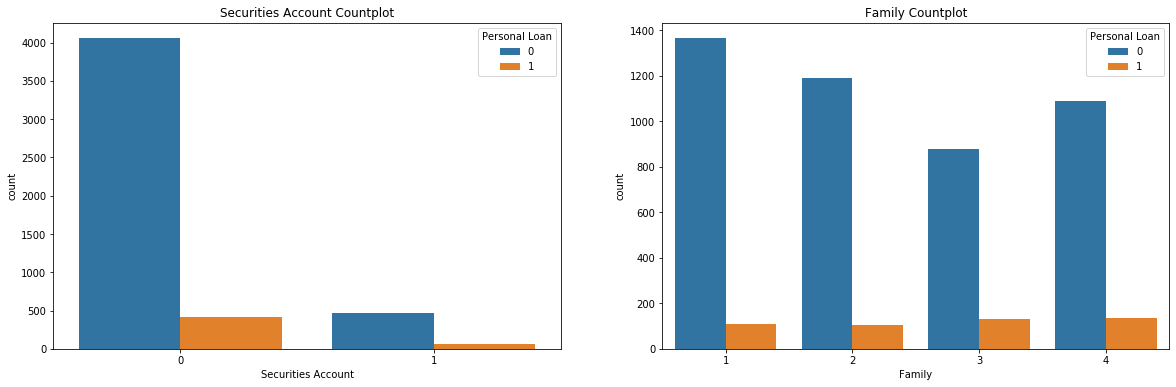

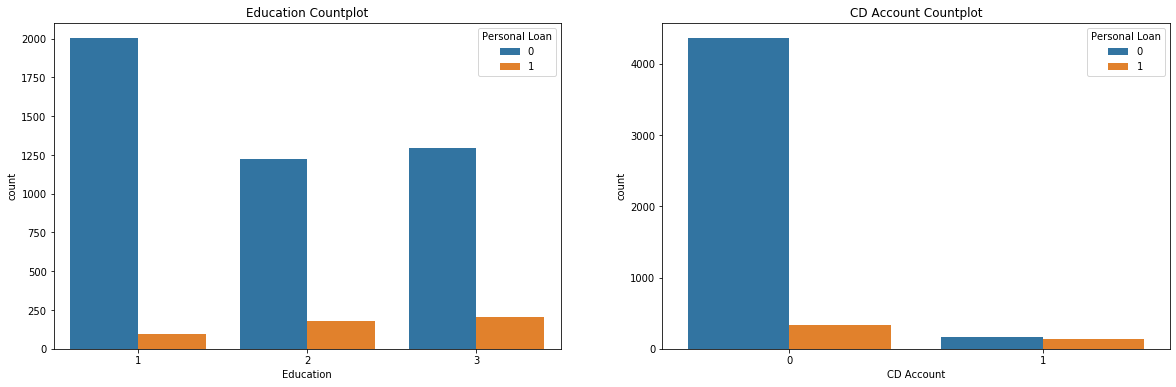

In [33]:
# Distribution of Categorical variables against Personal Loan

#Securities Account
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Securities Account',data=df,hue='Personal Loan')
plt.title("Securities Account Countplot")

#Family Size
plt.subplot(1, 2, 2)
sns.countplot(x='Family',data=df,hue='Personal Loan')
plt.title("Family Countplot")

#Education
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Education',data=df,hue='Personal Loan')
plt.title("Education Countplot")

#CD Account
plt.subplot(1, 2, 2)
sns.countplot(x='CD Account',data=df,hue='Personal Loan')
plt.title("CD Account Countplot")

Observation :

Majority of customers who does not have loan have securities account          
Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.                  
Education does not have any impact in personal loan. It looks like advanced professionals go for more loans compared to under grads, post grads.                 
Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well       


# 4. Split the data into training and test set in the ratio of 70:30 respectively 

In [34]:
#We can drop the attributes ID as it is just an Index value for the data and not required for building the model
#We can drop the Experience Attribute as age and experience attribute are highly correlated  
X = df.drop(["ID","Experience","Personal Loan"],axis=1)
Y = df["Personal Loan"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=100)
x_train.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4966,41,34,91361,1,0.7,1,143,0,0,0,0
4086,50,11,93106,4,0.2,1,0,1,0,0,0
2881,49,55,92103,4,0.1,3,0,0,0,1,0
1237,38,169,92093,1,6.8,3,0,0,1,1,1
1429,31,35,95064,1,0.6,3,171,0,0,0,0


checking the split of data

In [35]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [36]:
y_train.value_counts()

0    3178
1     322
Name: Personal Loan, dtype: int64

Scale the data

In [37]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(x_test) 

# 5.  Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans 

# 5a. Logistic Regression

In [38]:
#logistic regression model using Liblinear Solver
logRegr = LogisticRegression(solver="sag")

In [39]:
logRegr.fit(x_train, y_train)

C:\Users\Krish\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Use score method to get accuracy of train model
logreg_train_score = logRegr.score(x_train, y_train)
print('Train Accuracy Score:', np.round((logreg_train_score),4))

# Use score method to get accuracy of test model
logreg_test_score = logRegr.score(x_test, y_test)
print('Test Accuracy Score:', np.round((logreg_test_score),4))

Train Accuracy Score: 0.908
Test Accuracy Score: 0.8947


In [41]:
#Predict for train set
pred_train = logRegr.predict(x_train)

#Confusion Matrix
logreg_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_train.index.name = "Predicted"
logreg_cm_train.columns.name = "True"
logreg_cm_train

True,No,Yes
Predicted,,
No,3178,322
Yes,0,0


In [42]:
#Predict for test set
pred_test = logRegr.predict(x_test)

#Confusion Matrix
logreg_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_test.index.name = "Predicted"
logreg_cm_test.columns.name = "True"
logreg_cm_test

True,No,Yes
Predicted,,
No,1342,158
Yes,0,0


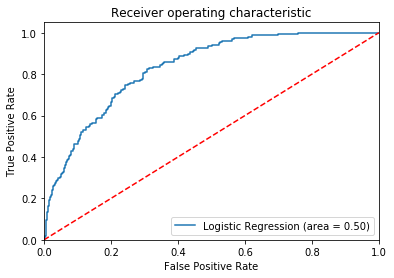

In [43]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, logRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
#Calculate auc score
auc_score = metrics.roc_auc_score(y_test, logRegr.predict_proba(x_test)[:,1])
print("AUC Score is:",round( float( auc_score ), 2 ))

AUC Score is: 0.83


In [45]:
# summarize the fit of the model
logreg_accuracy = np.round( metrics.accuracy_score( y_test, pred_test ), 4 )
print( 'Total Accuracy : ', logreg_accuracy)
print('\n')
print('Metrics Classification Report for logistic regression\n',metrics.classification_report(y_test, pred_test))

Total Accuracy :  0.8947


Metrics Classification Report for logistic regression
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1342
           1       0.00      0.00      0.00       158

    accuracy                           0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.89      0.84      1500



C:\Users\Krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
### Logistic regression Fit using Scaled Data 
logRegr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Use score method to get accuracy of train model
logreg_train_score_scaled = logRegr.score(X_train_scaled, y_train)
print('Train Accuracy Score:', np.round((logreg_train_score_scaled),4))

# Use score method to get accuracy of test model
logreg_test_score_scaled = logRegr.score(X_test_scaled, y_test)
print('Test Accuracy Score:', np.round((logreg_test_score_scaled),4))

Train Accuracy Score: 0.9554
Test Accuracy Score: 0.9453


In [48]:
#Predict for train set
pred_train_scaled = logRegr.predict(X_train_scaled)

#Confusion Matrix
logreg_cm_train_scaled = pd.DataFrame(confusion_matrix(y_train,pred_train_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_train_scaled.index.name = "Predicted"
logreg_cm_train_scaled.columns.name = "True"
logreg_cm_train_scaled

True,No,Yes
Predicted,,
No,3135,113
Yes,43,209


In [49]:
#make predictions
pred_test_scaled = logRegr.predict(X_test_scaled)
#Confusion Matrix
logreg_cm_test_scaled = pd.DataFrame(confusion_matrix(y_test,pred_test_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_test_scaled.index.name = "Predicted"
logreg_cm_test_scaled.columns.name = "True"
logreg_cm_test_scaled

True,No,Yes
Predicted,,
No,1330,70
Yes,12,88


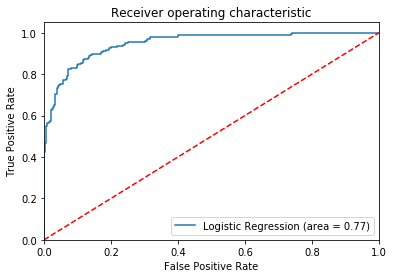

In [50]:

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc_scaled = roc_auc_score(y_test, logRegr.predict(X_test_scaled))
fpr_s, tpr_s, thresholds_s = roc_curve(y_test, logRegr.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr_s, tpr_s, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_scaled)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_scaled')
plt.show()

In [51]:
#Calculate auc score
auc_score_scaled = metrics.roc_auc_score(y_test, logRegr.predict_proba(X_test_scaled)[:,1])
round( float( auc_score_scaled ), 2 )

0.95

In [52]:
# summarize the fit of the model for scaled data
logreg_accuracy_scaled = np.round( metrics.accuracy_score( y_test, pred_test_scaled ), 4 )
print( 'Total Accuracy : ', logreg_accuracy_scaled)
print('\n')
print('Metrics Classification Report for logistic regression for scaled data:\n', metrics.classification_report(y_test, pred_test_scaled))

Total Accuracy :  0.9453


Metrics Classification Report for logistic regression for scaled data:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.88      0.56      0.68       158

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.94      0.95      0.94      1500



# 5b. Gaussian Naive Bayes Model

In [53]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)

# Use score method to get accuracy of train model
NB_train_score = model.score(x_train, y_train)
print('Train Accuracy Score:', np.round((NB_train_score),4))

# Use score method to get accuracy of test model
NB_test_score = model.score(x_test, y_test)
print('Test Accuracy Score:', np.round((NB_test_score),4))

Train Accuracy Score: 0.8871
Test Accuracy Score: 0.8867


In [54]:
#Predict for train set
pred_train_NB = model.predict(x_train)

#Confusion Matrix
NB_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_train.index.name = "Predicted"
NB_cm_train.columns.name = "True"
NB_cm_train

True,No,Yes
Predicted,,
No,2923,140
Yes,255,182


In [55]:
# make predictions
pred_test_NB = model.predict(x_test)

#Confusion Matrix
NB_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_test.index.name = "Predicted"
NB_cm_test.columns.name = "True"
NB_cm_test

True,No,Yes
Predicted,,
No,1234,62
Yes,108,96


In [56]:
#Calculate auc score
NB_auc_score = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
round( float( NB_auc_score ), 2 )

0.93

In [57]:
# summarize the fit of the model
NB_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_NB ), 4 )
print( 'Total Accuracy : ', NB_accuracy)
print('\n')
print('Metrics Classification Report for Naive bayes:\n', metrics.classification_report(y_test, pred_test_NB))

Total Accuracy :  0.8867


Metrics Classification Report for Naive bayes:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



In [58]:
### Fit Scaled Data
model.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
# Use score method to get accuracy of train model
NB_train_score_scaled = model.score(X_train_scaled, y_train)
print('Train Accuracy Score:', np.round((NB_train_score_scaled),4))

# Use score method to get accuracy of test model
NB_test_score_scaled = model.score(X_test_scaled, y_test)
print('Test Accuracy Score:', np.round((NB_test_score_scaled),4))

Train Accuracy Score: 0.8843
Test Accuracy Score: 0.888


In [60]:
#Predict for train set
pred_train_NB_scaled = model.predict(X_train_scaled)

#Confusion Matrix
NB_cm_train_scaled = pd.DataFrame(confusion_matrix(y_train,pred_train_NB_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_train_scaled.index.name = "Predicted"
NB_cm_train_scaled.columns.name = "True"
NB_cm_train_scaled

True,No,Yes
Predicted,,
No,2913,140
Yes,265,182


In [61]:
#make predictions
pred_test_NB_scaled = model.predict(X_test_scaled)

#Confusion Matrix
NB_cm_test_scaled = pd.DataFrame(confusion_matrix(y_test,pred_test_NB_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_test_scaled.index.name = "Predicted"
NB_cm_test_scaled.columns.name = "True"
NB_cm_test_scaled

True,No,Yes
Predicted,,
No,1238,64
Yes,104,94


In [62]:
#Calculate auc score
NB_auc_score_scaled = metrics.roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
round( float( NB_auc_score_scaled ), 2 )

0.93

In [63]:
# summarize the fit of the model for scaled data
NB_accuracy_scaled = np.round( metrics.accuracy_score( y_test, pred_test_NB_scaled ), 4 )
print( 'Total Accuracy : ', NB_accuracy_scaled)
print('\n')
print('Metrics Classification Report for Naive Bayes for scaled data: \n', metrics.classification_report(y_test, pred_test_NB_scaled))

Total Accuracy :  0.888


Metrics Classification Report for Naive Bayes for scaled data: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.59      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



# 5c. K-Nearest Neighbours Classification

In [64]:
# creating odd list of K for KNN
myList = list(range(1,70))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [65]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 31


In [66]:
# Invoking the KNN function to create the model
# fitting the model in the training data set

NNH = KNeighborsClassifier(n_neighbors= optimal_k , weights = 'distance')
NNH.fit(x_train, y_train)

# Use score method to get accuracy of train model
KNN_train_score = NNH.score(x_train, y_train)
print('Train Accuracy Score:', np.round((KNN_train_score),4))

# Use score method to get accuracy of test model
KNN_test_score = NNH.score(x_test, y_test)
print('Test Accuracy Score:', np.round((KNN_test_score),4))

Train Accuracy Score: 1.0
Test Accuracy Score: 0.8973


In [67]:
#Predict for train set
pred_train_KNN = NNH.predict(x_train)

#Confusion Matrix
KNN_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_train.index.name = "Predicted"
KNN_cm_train.columns.name = "True"
KNN_cm_train

True,No,Yes
Predicted,,
No,3178,0
Yes,0,322


In [68]:
#make predictions for test set
pred_test_KNN = NNH.predict(x_test)


#Confusion Matrix
KNN_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_test.index.name = "Predicted"
KNN_cm_test.columns.name = "True"
KNN_cm_test

True,No,Yes
Predicted,,
No,1338,150
Yes,4,8


In [69]:
#Calculate auc score
KNN_auc_score = metrics.roc_auc_score(y_test, NNH.predict_proba(x_test)[:,1])
round( float( KNN_auc_score ), 2 )

0.88

In [70]:
# summarize the fit of the model

KNN_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_KNN ), 4 )
print( 'Total Accuracy : ', KNN_accuracy )
print('\n')
print('Metrics Classification Report for KNN: \n', metrics.classification_report(y_test, pred_test_KNN))

Total Accuracy :  0.8973


Metrics Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1342
           1       0.67      0.05      0.09       158

    accuracy                           0.90      1500
   macro avg       0.78      0.52      0.52      1500
weighted avg       0.87      0.90      0.86      1500



In [71]:
### Fit scaled data
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='distance')

In [72]:
# Use score method to get accuracy of train model
KNN_train_score_scaled = NNH.score(X_train_scaled, y_train)
print('Train Accuracy Score:', np.round((KNN_train_score_scaled),4))

# Use score method to get accuracy of test model
KNN_test_score_scaled = NNH.score(X_test_scaled, y_test)
print('Test Accuracy Score:', np.round((KNN_test_score_scaled),4))

Train Accuracy Score: 1.0
Test Accuracy Score: 0.936


In [73]:
#Predict for train set
pred_train_KNN_scaled = model.predict(X_train_scaled)

#Confusion Matrix
KNN_cm_train_scaled = pd.DataFrame(confusion_matrix(y_train,pred_train_KNN_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_train_scaled.index.name = "Predicted"
KNN_cm_train_scaled.columns.name = "True"
KNN_cm_train_scaled

True,No,Yes
Predicted,,
No,2913,140
Yes,265,182


In [74]:
#make predictions
pred_test_KNN_scaled = NNH.predict(X_test_scaled)

#Confusion Matrix
KNN_cm_test_scaled = pd.DataFrame(confusion_matrix(y_test,pred_test_KNN_scaled).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_test_scaled.index.name = "Predicted"
KNN_cm_test_scaled.columns.name = "True"
KNN_cm_test_scaled

True,No,Yes
Predicted,,
No,1338,92
Yes,4,66


In [75]:
#Calculate auc score
KNN_auc_score_scaled = metrics.roc_auc_score(y_test, NNH.predict_proba(X_test_scaled)[:,1])
round( float( KNN_auc_score_scaled ), 2 )

0.97

In [76]:
# summarize the fit of the model
KNN_accuracy_scaled = np.round( metrics.accuracy_score( y_test, pred_test_KNN_scaled ), 4 )
print( 'Total Accuracy : ', KNN_accuracy_scaled)
print('\n')
print('Metrics Classification Report for KNN for scaled data:\n', metrics.classification_report(y_test, pred_test_KNN_scaled))

Total Accuracy :  0.936


Metrics Classification Report for KNN for scaled data:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1342
           1       0.94      0.42      0.58       158

    accuracy                           0.94      1500
   macro avg       0.94      0.71      0.77      1500
weighted avg       0.94      0.94      0.92      1500



# 6. Print the confusion matrix for all the above models

# 6a. Confusion Matrix for Logistic Regression

In [77]:
print('Confusion Matrix for Logistic Regression before scaling:')
logreg_cm_test

Confusion Matrix for Logistic Regression before scaling:


True,No,Yes
Predicted,,
No,1342,158
Yes,0,0


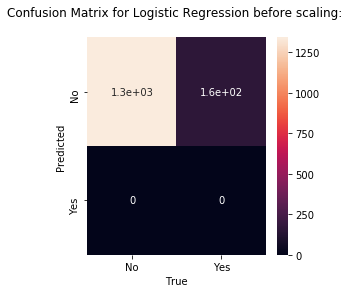

In [78]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Logistic Regression before scaling: \n")
ax=sns.heatmap(logreg_cm_test, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [79]:
print('Confusion Matrix for Logistic Regression for Scaled Data:')
logreg_cm_test_scaled

Confusion Matrix for Logistic Regression for Scaled Data:


True,No,Yes
Predicted,,
No,1330,70
Yes,12,88


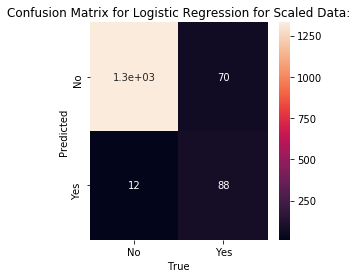

In [80]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Logistic Regression for Scaled Data:")
ax=sns.heatmap(logreg_cm_test_scaled, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 6b. Confusion Matrix for Naive Bayes

In [81]:
print("Confusion Matrix for Naive Bayes Classifier before scaling:")
NB_cm_test

Confusion Matrix for Naive Bayes Classifier before scaling:


True,No,Yes
Predicted,,
No,1234,62
Yes,108,96


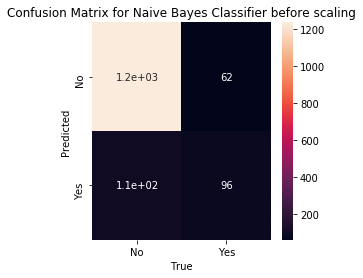

In [82]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Naive Bayes Classifier before scaling")
ax=sns.heatmap(NB_cm_test, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [83]:
print("Confusion Matrix for Naive Bayes Classifier for scaled Data:")
NB_cm_test_scaled

Confusion Matrix for Naive Bayes Classifier for scaled Data:


True,No,Yes
Predicted,,
No,1238,64
Yes,104,94


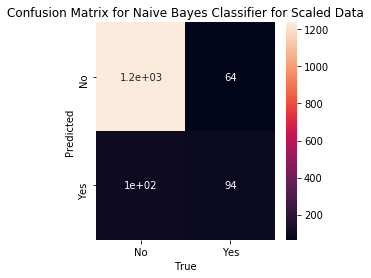

In [84]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for Naive Bayes Classifier for Scaled Data")
ax=sns.heatmap(NB_cm_test_scaled, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 6c. Confusion Matrix for KNN

In [85]:
print("Confusion Matrix for K-Nearest Neighbours before Scaling:")
KNN_cm_test

Confusion Matrix for K-Nearest Neighbours before Scaling:


True,No,Yes
Predicted,,
No,1338,150
Yes,4,8


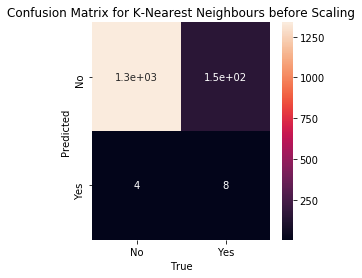

In [86]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for K-Nearest Neighbours before Scaling")
ax=sns.heatmap(KNN_cm_test, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [87]:
print("Confusion Matrix for K-Nearest Neighbours for Scaled data:")
KNN_cm_test_scaled

Confusion Matrix for K-Nearest Neighbours for Scaled data:


True,No,Yes
Predicted,,
No,1338,92
Yes,4,66


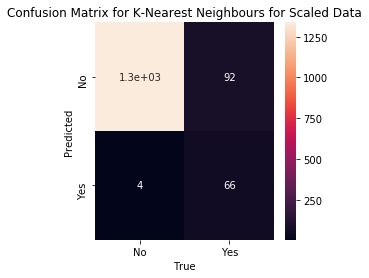

In [88]:
plt.figure(figsize = (4,4))
plt.title("Confusion Matrix for K-Nearest Neighbours for Scaled Data")
ax=sns.heatmap(KNN_cm_test_scaled, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 7. Give your reasoning on which is the best model in this case and why it performs better?

In [89]:
#Compare the Train, Test Set and Model accuracy of all the models
acc_dict = {'Model':['LR','NB','KNN','LR Scaled', 'NB Scaled', 'KNN Scaled'], 
            'Training Set Accuracy': [logreg_train_score, NB_train_score, KNN_train_score, 
                         logreg_train_score_scaled, NB_train_score_scaled, KNN_train_score_scaled],
            'Testing Set Accuracy': [logreg_test_score, NB_test_score, KNN_test_score, 
                         logreg_test_score_scaled, NB_test_score_scaled, KNN_test_score_scaled],
            'Model Accuracy': [logreg_accuracy, NB_accuracy, KNN_accuracy, 
                         logreg_accuracy_scaled, NB_accuracy_scaled, KNN_accuracy_scaled]
           }
acc = pd.DataFrame(acc_dict)
print(acc)

        Model  Training Set Accuracy  Testing Set Accuracy  Model Accuracy
0          LR               0.908000              0.894667          0.8947
1          NB               0.887143              0.886667          0.8867
2         KNN               1.000000              0.897333          0.8973
3   LR Scaled               0.955429              0.945333          0.9453
4   NB Scaled               0.884286              0.888000          0.8880
5  KNN Scaled               1.000000              0.936000          0.9360


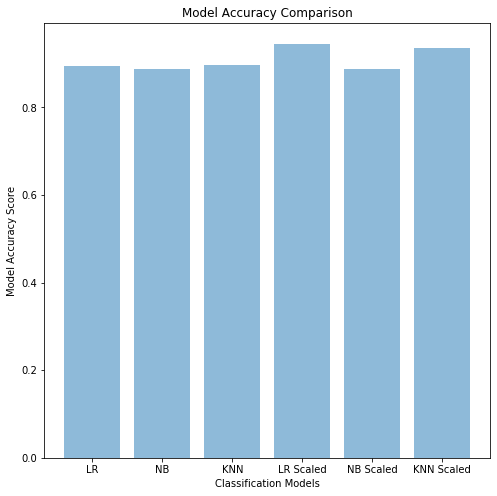

In [90]:
plt.figure(figsize = (8,8))
plt.bar(acc['Model'],acc['Model Accuracy'],align='center',alpha=0.5)
plt.title("Model Accuracy Comparison")
plt.xlabel("Classification Models")
plt.ylabel("Model Accuracy Score")
plt.show()


Observation: From the train, test set accuracy score, we could see that the models are just fitted as expected, they are not either over fitted or under fitted. The effect of data scaling is more pronounced in Logistic Regression and KNN while Naive Bayes is unaffected by scaliing.

Based on the accuracy score and model selection, we could see that logistic regression model (89.93%) predicts the possibility of a customer buying a personal loan better than Naive Bayes and KNN.

Similarly for the scaled data Logistic Regrssion Model has a accuracy of 94.47% for the customer opting for personal loan better than the Naive Bayes and KNN.
